<a href="https://www.kaggle.com/code/elhammahdian/car-price-linear-regression?scriptVersionId=113326928" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Dataset
data = pd.read_csv('/kaggle/input/car-data/cardata.csv') 
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#convert Dataset to DataFrame
df = pd.DataFrame(data)
df.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
#convert to the int
df['Year'] = df['Year'].astype(int)

In [6]:
# Define column named Age based on the Year
df['Age'] = [(2019 - y) for y in df['Year']]
df['Age']= df["Age"].astype(float)

In [7]:
# Drop Year and Canr_Name Column before start initial analysis
df.drop("Year", axis=1, inplace=True)
df.drop("Car_Name", axis=1, inplace=True)
df.tail(20)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
281,2.10,7.60,50456,Petrol,Dealer,Manual,0,13.0
282,8.25,14.00,63000,Diesel,Dealer,Manual,0,5.0
283,8.99,11.80,9010,Petrol,Dealer,Manual,0,3.0
284,3.50,5.90,9800,Petrol,Dealer,Manual,0,6.0
285,7.40,8.50,15059,Petrol,Dealer,Automatic,0,3.0
286,5.65,7.90,28569,Petrol,Dealer,Manual,0,3.0
287,5.75,7.50,44000,Petrol,Dealer,Automatic,0,4.0
288,8.40,13.60,34000,Petrol,Dealer,Manual,0,4.0
289,10.11,13.60,10980,Petrol,Dealer,Manual,0,3.0
290,4.50,6.40,19000,Petrol,Dealer,Manual,0,5.0


In [8]:
#standard correlation coeffcient
corr_matrix= df.corr()
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Age             -0.236141
Name: Selling_Price, dtype: float64

In [9]:
# present_price has the highest Coefficent

In [10]:
# replacing Str values with Number
df['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[2, 3, 4], inplace=True) 
df['Seller_Type'].replace(['Dealer', 'Individual'],[2, 3], inplace=True)
df['Transmission'].replace(['Manual', 'Automatic'],[2, 3], inplace=True)
df['Owner'].replace([0, 1, 3],[2, 3, 4], inplace=True)

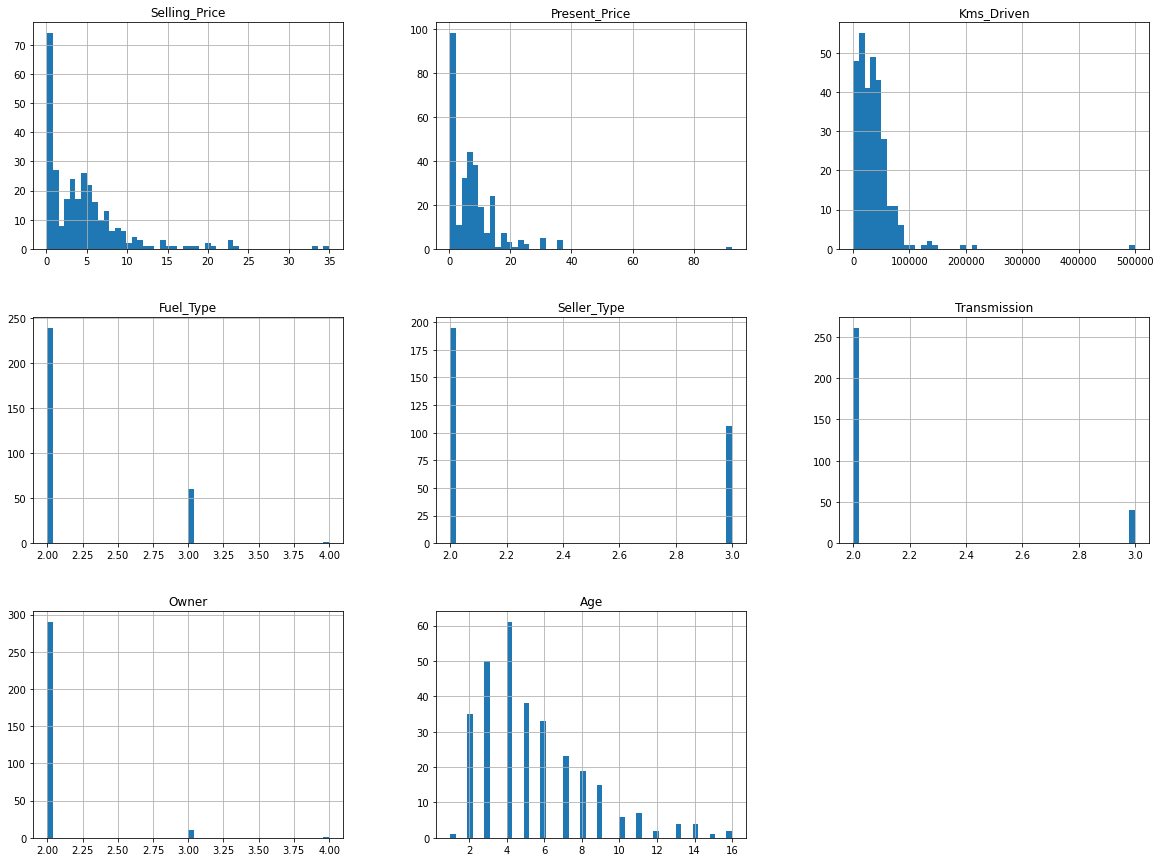

In [11]:
#Drowing Histogram for each Feature 
df.hist(bins=50,figsize=(20,15))
plt.show()

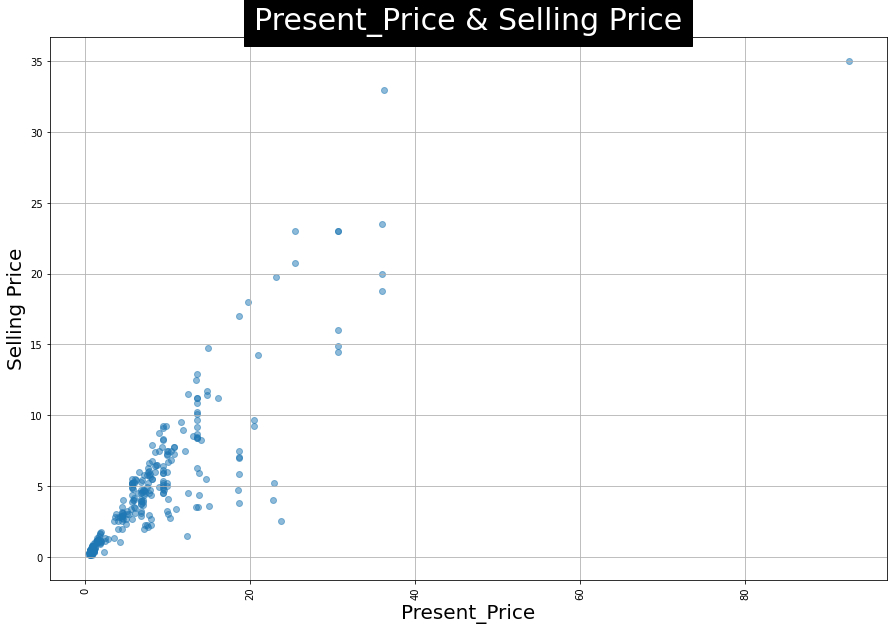

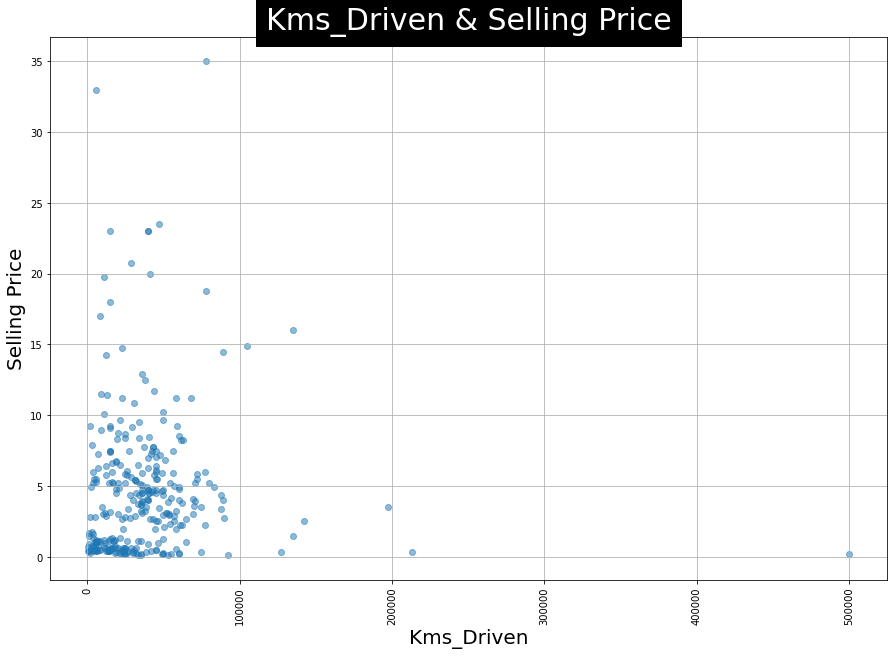

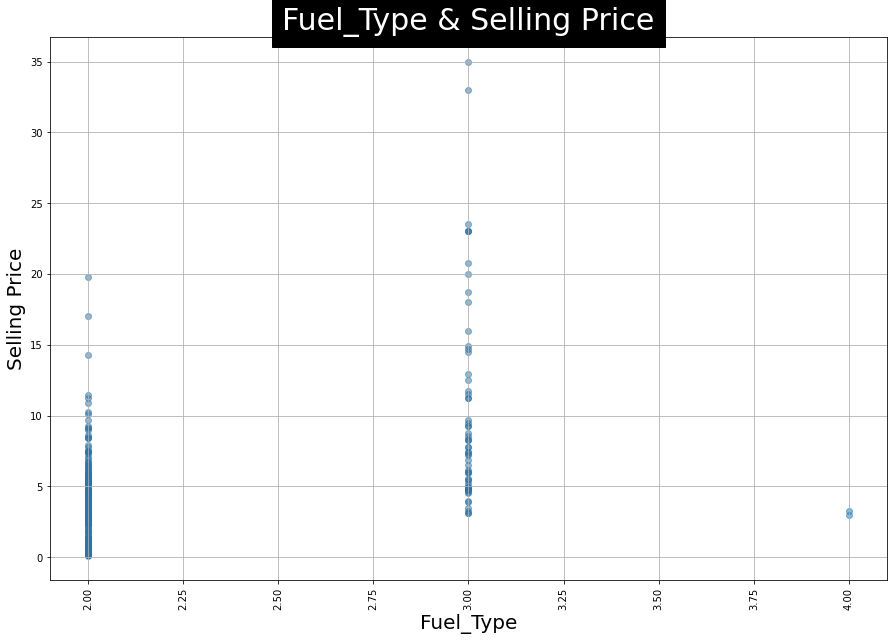

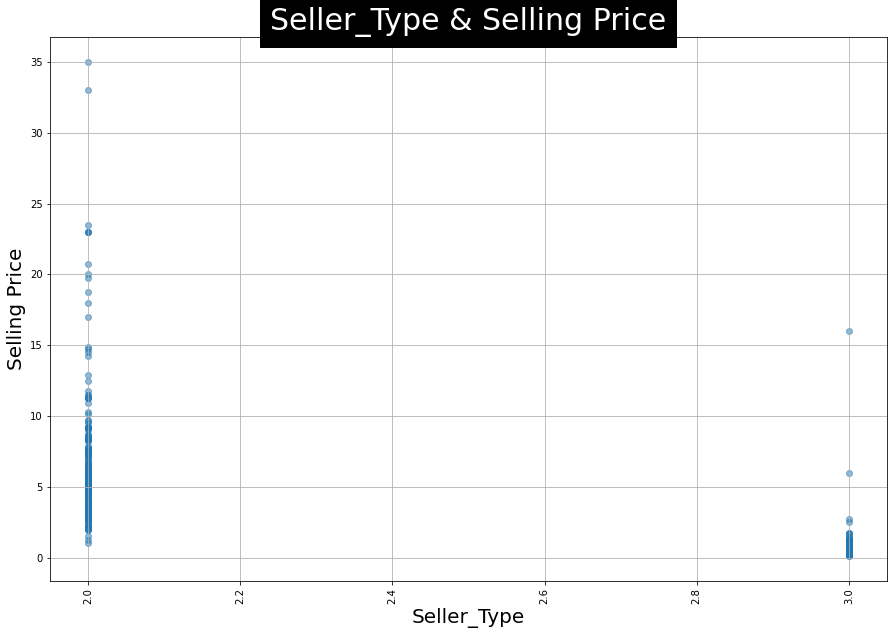

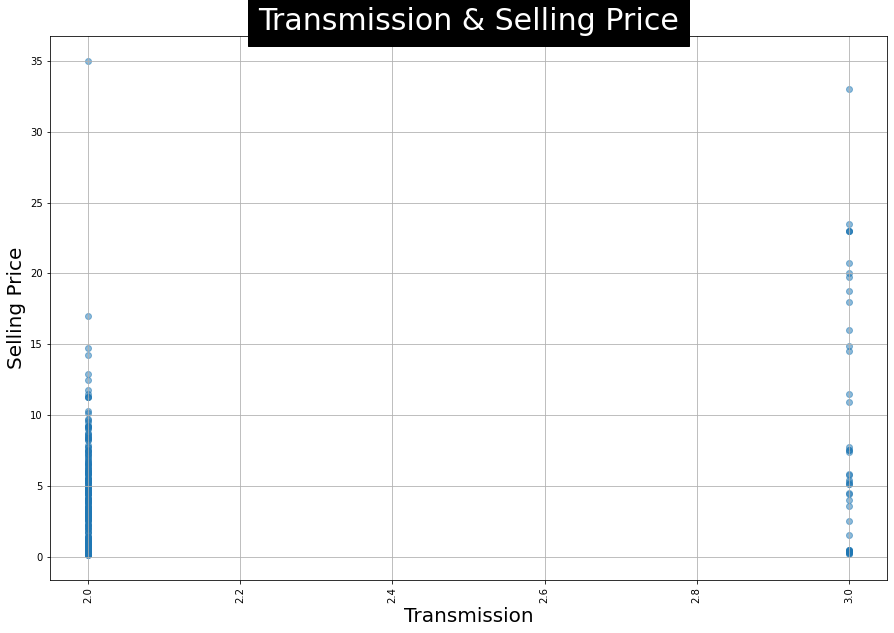

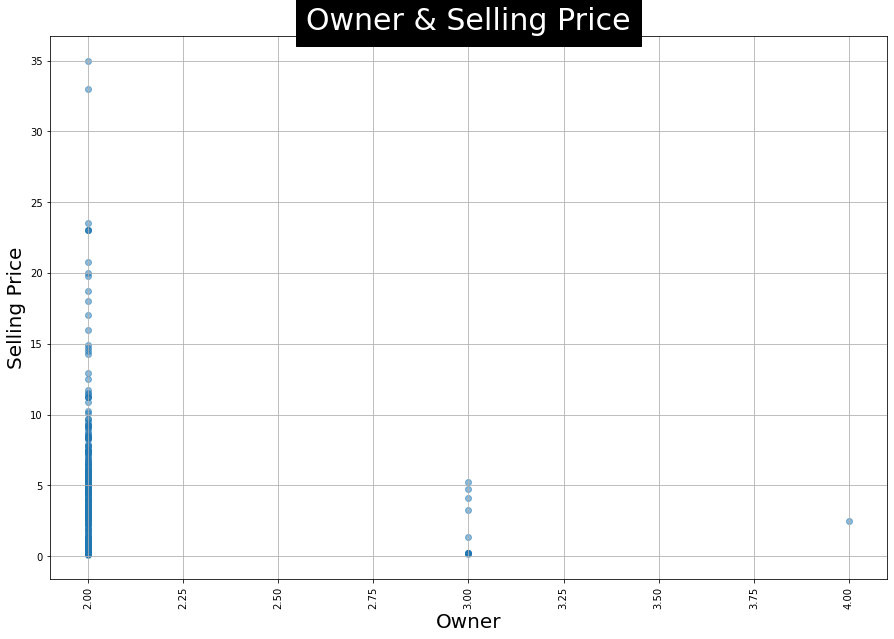

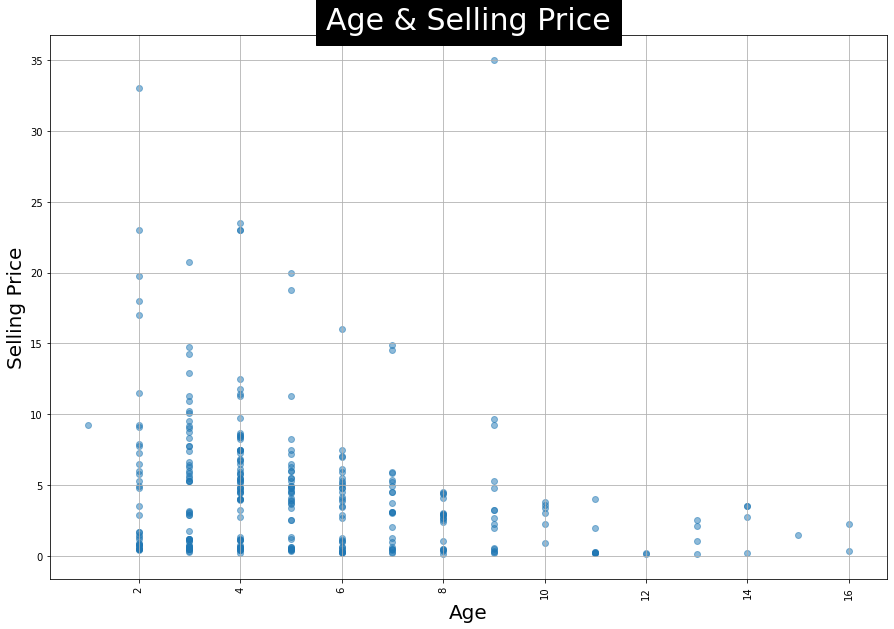

In [12]:
# Drawing Sacatter plot for Features
for column in df.drop(columns=['Selling_Price']).columns : 
    plt.figure(figsize=(15,10))
    plt.scatter(df[column],df['Selling_Price'] , alpha=.5 )
    plt.title(column+" & Selling Price",backgroundcolor='black',color='white',fontsize=30)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Selling Price",fontsize=20)
    plt.grid()
    plt.show()

In [13]:
#Normalize our data
scaler = MinMaxScaler()
norm1 = scaler.fit_transform(df[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner', 'Age']])

In [14]:
norm1_df = pd.DataFrame(norm1 , columns = ['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner', 'Age'])
norm1_df.describe()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.130696,0.079199,0.072967,0.106312,0.352159,0.132890,0.019934,0.291473
std,0.145639,0.093673,0.077852,0.212901,0.478439,0.340021,0.106151,0.192770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022923,0.009536,0.029029,0.000000,0.000000,0.000000,0.000000,0.133333
50%,0.100287,0.065886,0.063063,0.000000,0.000000,0.000000,0.000000,0.266667
75%,0.169054,0.103814,0.096631,0.000000,1.000000,0.000000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Define our X and Y
x = norm1_df[['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner', 'Age']]
y = norm1_df['Selling_Price'].values.reshape(-1 , 1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
result = model.score(x_test , y_test)
print(result)

0.9141615455495989


In [19]:
print('Mean Absolute Erorr: ', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error: ', metrics. mean_squared_error(y_test , y_pred))
print('Root Mean Squared Erorr: ', np. sqrt(metrics. mean_squared_error(y_test , y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Erorr:  0.028305029076774246
Mean Squared Error:  0.0017814024176509085
Root Mean Squared Erorr:  0.04220666319019911
R2 Score:  0.9141615455495989


In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
model_new = LinearRegression()

In [22]:
kfold_val = KFold(10)
results = cross_val_score(model_new , x_train, y_train, cv = kfold_val)
print(results)

[0.77474585 0.62575404 0.87871574 0.7810228  0.8366869  0.82964256
 0.14726465 0.86431724 0.93939939 0.81074063]


In [23]:
print(np.mean(results))

0.7488289806422302


In [24]:
Fold_Volum = 301/10
print(Fold_Volum)

30.1


In [25]:
df1 = norm1_df[norm1_df.index<120]
df2 = norm1_df[norm1_df.index>151]
df3 = df1.append(df2)
df3.reset_index(drop = True, inplace = True)
df3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.093123,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.133238,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.204871,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.078797,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.128940,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...,...
264,0.269341,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333
265,0.111748,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
266,0.093123,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
267,0.326648,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667


In [26]:
x2 = df3.drop('Selling_Price', axis = 1)
y2 = df3['Selling_Price'].values.reshape(-1 , 1)

In [27]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2 , test_size = 0.2 , random_state = 0)
regressor2 = LinearRegression()
regressor2.fit(x_train2,y_train2)

LinearRegression()

In [28]:
y_pred2 = regressor2.predict(x_test2)

In [29]:
print('Mean Absolute Erorr: ', metrics.mean_absolute_error(y_test2 , y_pred2))
print('Mean Squared Error: ', metrics. mean_squared_error(y_test2 , y_pred2))
print('Root Mean Squared Erorr: ', np. sqrt(metrics. mean_squared_error(y_test2 , y_pred2)))
print('R2 Score: ', metrics.r2_score(y_test2, y_pred2))

Mean Absolute Erorr:  0.04336356401749385
Mean Squared Error:  0.0047489867768696035
Root Mean Squared Erorr:  0.06891289267524331
R2 Score:  0.8120624365195939


In [30]:
# حال نوبت به توان دو رساندن متغیرهای می رسد.

In [31]:
x = norm1_df[['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner', 'Age']]
y = norm1_df['Selling_Price']

In [32]:
def Evaluation(D, testsize):
    r2 =  0.9134181721224683
    for column in x: 
        New_col_name = column + str(D)
        Val_New_col = x[column]**D
        x.insert(0, New_col_name, Val_New_col)
        x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = testsize, random_state = 0)
        New_Model = LinearRegression()
        New_Model.fit( x_train, y_train)
        y_pred = New_Model.predict(x_test)
        r2_New = metrics.r2_score(y_test , y_pred)
        if r2_New < r2:
            x.drop([New_col_name], axis = 1 , inplace = True)
        else:
                r2 = r2_New
        print("R2 Score:", r2)
        
Evaluation(2, 0.2)

R2 Score: 0.9210110169738654
R2 Score: 0.9288304191570149
R2 Score: 0.9291026416138657
R2 Score: 0.9291026416138657
R2 Score: 0.9291026416138657
R2 Score: 0.9311515333475039
R2 Score: 0.9311515333475039


In [33]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.0,0.00,0.002815,0.003261,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.0,0.25,0.007239,0.009983,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.0,0.00,0.000164,0.010665,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.0,0.00,0.000089,0.001723,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.0,0.25,0.007053,0.005038,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.25,0.004495,0.014942,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333
297,0.0,0.00,0.014189,0.003656,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
298,0.0,0.00,0.030640,0.013395,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
299,0.0,0.25,0.000290,0.017421,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667


In [34]:
#  این امر نشان داد که همواره تقسیم متغیرهای پر اهمیت سبب کاسته شدن میزان r2 score می شوند لذا ستون های اضافه شده را بایتسی حذف نمود.
# برای تحلیل بیشتر داده ها ستون هایی از تقسیم ستون های جدید بدست آمده( از به توان دو رسیدن متغیر ها) ساخته شد اما چون مقدار آن ها به بی نهایت میل مینمود از تحلیل دادهها صرف نظر شد و ستون های اضافه شده حذف گردید.

In [35]:
kms_pr = x['Kms_Driven']* x['Present_Price']
kms_pr2 = x['Kms_Driven']* x['Present_Price2']
kms2_pr2 = x['Kms_Driven2']* x['Present_Price2']
kms2_pr = x['Kms_Driven2']* x['Present_Price']
p2_Fuel = x['Present_Price2']*x['Fuel_Type']
p_Fuel = x['Present_Price']*x['Fuel_Type']
p_Fuel2 = x['Present_Price']*x['Fuel_Type2']
p2_Fuel2 = x['Present_Price2']*x['Fuel_Type2']

In [36]:
x.insert(0, 'kms_pr', kms_pr)
x.insert(0, 'kms_pr2', kms_pr2)
x.insert(0, 'kms2_pr2', kms_pr2)
x.insert(0, 'kms2_pr', kms2_pr)
x.insert(0, 'p2_Fuel', p2_Fuel)
x.insert(0, 'p_Fuel', p_Fuel)
x.insert(0, 'p_Fuel2', p_Fuel2)
x.insert(0, 'p2_Fuel2', p2_Fuel2)
x

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.000000,0.000000,0.000000,0.000000,0.000161,0.000173,0.000173,0.003030,0.0,0.00,0.002815,0.003261,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.002496,0.024978,0.049957,0.004991,0.000723,0.000849,0.000849,0.008501,0.0,0.25,0.007239,0.009983,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.000000,0.000000,0.000000,0.000000,0.000017,0.000137,0.000137,0.001323,0.0,0.00,0.000164,0.010665,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.000000,0.000000,0.000000,0.000000,0.000004,0.000016,0.000016,0.000391,0.0,0.00,0.000089,0.001723,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.001260,0.017745,0.035490,0.002519,0.000501,0.000423,0.000423,0.005961,0.0,0.25,0.007053,0.005038,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.003735,0.030559,0.061118,0.007471,0.000549,0.001002,0.001002,0.008195,0.0,0.25,0.004495,0.014942,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333
297,0.000000,0.000000,0.000000,0.000000,0.000858,0.000436,0.000436,0.007203,0.0,0.00,0.014189,0.003656,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
298,0.000000,0.000000,0.000000,0.000000,0.003546,0.002345,0.002345,0.020259,0.0,0.00,0.030640,0.013395,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
299,0.004355,0.032997,0.065995,0.008711,0.000038,0.000296,0.000296,0.002246,0.0,0.25,0.000290,0.017421,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)
print('Mean Absolute Erorr: ', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error: ', metrics. mean_squared_error(y_test , y_pred))
print('Root Mean Squared Erorr: ', np. sqrt(metrics. mean_squared_error(y_test , y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Erorr:  0.021302027435342926
Mean Squared Error:  0.0010572114034421323
Root Mean Squared Erorr:  0.03251478745804949
R2 Score:  0.9490573314599623


In [38]:
# Kfold Evaluation
NewRegression = LinearRegression()
kfold_val = KFold(10)
results = cross_val_score(NewRegression , x, y, cv = kfold_val)
print(results)
print(np.mean(results))

[ 8.66580761e-01  9.25076455e-01 -1.69994207e-01  9.72338136e-01
 -9.49190130e+00 -3.06157804e+02 -2.85699764e+00  8.23690355e-01
  8.46675648e-01  9.09813512e-01]
-31.333252232688352


In [39]:
x.shape

(301, 19)

In [40]:
Kfold_Volum = 301/10
print(Kfold_Volum)

30.1


In [41]:
x1 = x[x.index<120]
x2 = x[x.index>151]
x3 = x1.append(x2)
x3.reset_index(drop = True, inplace = True)
x3

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.000000,0.000000,0.000000,0.000000,0.000161,0.000173,0.000173,0.003030,0.0,0.00,0.002815,0.003261,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.002496,0.024978,0.049957,0.004991,0.000723,0.000849,0.000849,0.008501,0.0,0.25,0.007239,0.009983,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.000000,0.000000,0.000000,0.000000,0.000017,0.000137,0.000137,0.001323,0.0,0.00,0.000164,0.010665,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.000000,0.000000,0.000000,0.000000,0.000004,0.000016,0.000016,0.000391,0.0,0.00,0.000089,0.001723,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.001260,0.017745,0.035490,0.002519,0.000501,0.000423,0.000423,0.005961,0.0,0.25,0.007053,0.005038,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.003735,0.030559,0.061118,0.007471,0.000549,0.001002,0.001002,0.008195,0.0,0.25,0.004495,0.014942,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333
265,0.000000,0.000000,0.000000,0.000000,0.000858,0.000436,0.000436,0.007203,0.0,0.00,0.014189,0.003656,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
266,0.000000,0.000000,0.000000,0.000000,0.003546,0.002345,0.002345,0.020259,0.0,0.00,0.030640,0.013395,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
267,0.004355,0.032997,0.065995,0.008711,0.000038,0.000296,0.000296,0.002246,0.0,0.25,0.000290,0.017421,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667


In [42]:
y = norm1_df['Selling_Price']
y1 = y[y.index<120]
y2 = y[y.index>151]
y3 = y1.append(y2)
y3.reset_index(drop = True, inplace = True)
y3

0      0.093123
1      0.133238
2      0.204871
3      0.078797
4      0.128940
         ...   
264    0.269341
265    0.111748
266    0.093123
267    0.326648
268    0.148997
Name: Selling_Price, Length: 269, dtype: float64

In [43]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3 , test_size = 0.2 , random_state = 0)
regressor3 = LinearRegression()
regressor3.fit(x_train3,y_train3)
y_pred3 = regressor3.predict(x_test3)

In [44]:
print('Mean Absolute Erorr: ', metrics.mean_absolute_error(y_test3 , y_pred3))
print('Mean Squared Error: ', metrics. mean_squared_error(y_test3 , y_pred3))
print('Root Mean Squared Erorr: ', np. sqrt(metrics. mean_squared_error(y_test3 , y_pred3)))
print('R2 Score: ', metrics.r2_score(y_test3, y_pred3))

Mean Absolute Erorr:  0.02044826802193532
Mean Squared Error:  0.0009343518402527838
Root Mean Squared Erorr:  0.030567169320249197
R2 Score:  0.9630237318945974


In [45]:
# Visulalixation

In [46]:
x_test3

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
253,0.000000,0.000000,0.000000,0.000000,7.530743e-05,2.290274e-04,2.290274e-04,0.002584,0.00,0.00,0.000850,0.007858,0.088643,0.029147,0.0,0.0,1.0,0.0,0.133333
214,0.000000,0.000000,0.000000,0.000000,3.344752e-04,3.395291e-04,3.395291e-04,0.004843,0.00,0.00,0.004771,0.004916,0.070113,0.069069,0.0,0.0,0.0,0.0,0.400000
73,0.000000,0.000000,0.000000,0.000000,4.228517e-04,2.902791e-04,2.902791e-04,0.004970,0.00,0.00,0.007239,0.003412,0.058409,0.085085,0.0,0.0,0.0,0.0,0.466667
181,0.000000,0.000000,0.000000,0.000000,2.718681e-04,3.061076e-04,3.061076e-04,0.004366,0.00,0.00,0.003878,0.004916,0.070113,0.062270,0.0,0.0,0.0,0.0,0.466667
179,0.006147,0.039201,0.078403,0.012294,1.163948e-03,2.118401e-03,2.118401e-03,0.013510,0.00,0.25,0.007423,0.024588,0.156805,0.086156,0.5,0.0,0.0,0.0,0.200000
109,0.000000,0.000000,0.000000,0.000000,5.506782e-06,3.264633e-06,3.264633e-06,0.000262,0.00,0.00,0.000442,0.000155,0.012462,0.021021,0.0,1.0,0.0,0.0,0.066667
184,0.000000,0.000000,0.000000,0.000000,2.570548e-05,4.765563e-05,4.765563e-05,0.001070,0.00,0.00,0.000577,0.001984,0.044538,0.024024,0.0,0.0,0.0,0.0,0.133333
182,0.000000,0.000000,0.000000,0.000000,8.989511e-05,1.334689e-04,1.334689e-04,0.002289,0.00,0.00,0.001542,0.003399,0.058301,0.039267,0.0,0.0,0.0,0.0,0.066667
15,0.003218,0.028365,0.056730,0.006436,8.213835e-04,1.095296e-03,1.095296e-03,0.009654,0.00,0.25,0.007239,0.012873,0.113459,0.085085,0.5,0.0,0.0,0.0,0.133333
8,0.002156,0.023217,0.046435,0.004312,1.455283e-04,3.414157e-04,3.414157e-04,0.003676,0.00,0.25,0.001567,0.008625,0.092870,0.039586,0.5,0.0,0.0,0.0,0.133333


In [47]:
x_test3.insert(19 , 'y_test3', y_test3)
x_test3.insert(20 , 'y_pred3', y_pred3)
x_test3

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,...,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,y_test3,y_pred3
253,0.000000,0.000000,0.000000,0.000000,7.530743e-05,2.290274e-04,2.290274e-04,0.002584,0.00,0.00,...,0.007858,0.088643,0.029147,0.0,0.0,1.0,0.0,0.133333,0.209169,0.216939
214,0.000000,0.000000,0.000000,0.000000,3.344752e-04,3.395291e-04,3.395291e-04,0.004843,0.00,0.00,...,0.004916,0.070113,0.069069,0.0,0.0,0.0,0.0,0.400000,0.104585,0.105237
73,0.000000,0.000000,0.000000,0.000000,4.228517e-04,2.902791e-04,2.902791e-04,0.004970,0.00,0.00,...,0.003412,0.058409,0.085085,0.0,0.0,0.0,0.0,0.466667,0.073066,0.074433
181,0.000000,0.000000,0.000000,0.000000,2.718681e-04,3.061076e-04,3.061076e-04,0.004366,0.00,0.00,...,0.004916,0.070113,0.062270,0.0,0.0,0.0,0.0,0.466667,0.080229,0.099910
179,0.006147,0.039201,0.078403,0.012294,1.163948e-03,2.118401e-03,2.118401e-03,0.013510,0.00,0.25,...,0.024588,0.156805,0.086156,0.5,0.0,0.0,0.0,0.200000,0.333811,0.300834
109,0.000000,0.000000,0.000000,0.000000,5.506782e-06,3.264633e-06,3.264633e-06,0.000262,0.00,0.00,...,0.000155,0.012462,0.021021,0.0,1.0,0.0,0.0,0.066667,0.031519,0.045596
184,0.000000,0.000000,0.000000,0.000000,2.570548e-05,4.765563e-05,4.765563e-05,0.001070,0.00,0.00,...,0.001984,0.044538,0.024024,0.0,0.0,0.0,0.0,0.133333,0.080229,0.104936
182,0.000000,0.000000,0.000000,0.000000,8.989511e-05,1.334689e-04,1.334689e-04,0.002289,0.00,0.00,...,0.003399,0.058301,0.039267,0.0,0.0,0.0,0.0,0.066667,0.147564,0.137433
15,0.003218,0.028365,0.056730,0.006436,8.213835e-04,1.095296e-03,1.095296e-03,0.009654,0.00,0.25,...,0.012873,0.113459,0.085085,0.5,0.0,0.0,0.0,0.133333,0.219198,0.227857
8,0.002156,0.023217,0.046435,0.004312,1.455283e-04,3.414157e-04,3.414157e-04,0.003676,0.00,0.25,...,0.008625,0.092870,0.039586,0.5,0.0,0.0,0.0,0.133333,0.247851,0.218303


In [48]:
df1 = x_test3.sort_values(by = ['Present_Price'])


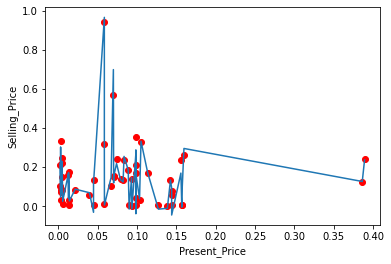

In [49]:
a = df1.Present_Price
b = y_test3
c = df1.Present_Price
d = y_pred3
plt.scatter(a , b, color = 'red')
plt.plot(a , d)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

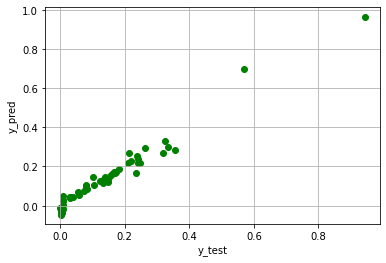

In [50]:
plt.scatter(y_test3, y_pred3, color = 'green')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid()
plt.show()

In [51]:
# با توجه به نمودار فوق می توان بیان کرد که  بازه y_test  و y_pred تقریبا مشابه هم بوده و بین صفر تا یک می باشند.که این نشان دهنده خوب بودن مدل پیش بینی ما می باشد.

In [52]:
print(regressor3.intercept_)
print(regressor3.coef_)

0.0075873829014334315
[ 4.80206705e-01 -3.15905404e+00  2.61114867e+00  2.14179064e+00
  2.35679330e+01  4.16839967e+00  4.16839967e+00 -1.52009079e+01
 -3.12768412e-02  1.51218525e-01 -4.27153710e-01 -2.97211962e+00
  2.79901443e+00  4.38269094e-01 -1.40410339e-01  6.60977348e-03
  2.42105186e-02  1.22329792e-02 -1.23302851e-01]


In [53]:
Data =pd.concat([x3, y3], axis=1)

In [54]:
Data.reset_index(drop = True, inplace = True)

In [55]:
Data

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price
0,0.000000,0.000000,0.000000,0.000000,0.000161,0.000173,0.000173,0.003030,0.0,0.00,0.002815,0.003261,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.093123
1,0.002496,0.024978,0.049957,0.004991,0.000723,0.000849,0.000849,0.008501,0.0,0.25,0.007239,0.009983,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.133238
2,0.000000,0.000000,0.000000,0.000000,0.000017,0.000137,0.000137,0.001323,0.0,0.00,0.000164,0.010665,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.204871
3,0.000000,0.000000,0.000000,0.000000,0.000004,0.000016,0.000016,0.000391,0.0,0.00,0.000089,0.001723,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.078797
4,0.001260,0.017745,0.035490,0.002519,0.000501,0.000423,0.000423,0.005961,0.0,0.25,0.007053,0.005038,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.128940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.003735,0.030559,0.061118,0.007471,0.000549,0.001002,0.001002,0.008195,0.0,0.25,0.004495,0.014942,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,0.269341
265,0.000000,0.000000,0.000000,0.000000,0.000858,0.000436,0.000436,0.007203,0.0,0.00,0.014189,0.003656,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.111748
266,0.000000,0.000000,0.000000,0.000000,0.003546,0.002345,0.002345,0.020259,0.0,0.00,0.030640,0.013395,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.093123
267,0.004355,0.032997,0.065995,0.008711,0.000038,0.000296,0.000296,0.002246,0.0,0.25,0.000290,0.017421,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.326648


Test our Model with the new Data

In [56]:
Data.columns

Index(['p2_Fuel2', 'p_Fuel2', 'p_Fuel', 'p2_Fuel', 'kms2_pr', 'kms2_pr2',
       'kms_pr2', 'kms_pr', 'Owner2', 'Fuel_Type2', 'Kms_Driven2',
       'Present_Price2', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age', 'Selling_Price'],
      dtype='object')

In [57]:
# چون داده ها نرمالایز شده اند برای اینکه بتوانیم پیش بینی درستی داشته باشیم مقادیر نرمالایز شده سایر شاخص ها را درنظر میگیریم

In [58]:
 # مقدار نرمالایز شده قیمت فروش برای تست مدل برابر است با 0.269341
Present_Price = 0.122237
Kms_Driven = 0.067043 
Fuel_Type = 0.5
Seller_Type = 0
Transmission = 0
Owner = 0
Age = 0.133333

Input= pd.DataFrame({'Selling_Price': 12,
                     'p2_Fuel2' :[((Present_Price**2)*(Fuel_Type**2))],
                     'p_Fuel2':[((Present_Price)*(Fuel_Type**2))],
                     'p_Fuel':[(Present_Price*Fuel_Type)],
                     'p2_Fuel':[((Present_Price**2)*Fuel_Type)],
                     'kms2_pr':[(Kms_Driven**2)*(Present_Price)],
                     'kms2_pr2':[((Kms_Driven**2)*(Present_Price**2))],
                     'kms_pr2':[(Kms_Driven*(Present_Price**2))],
                     'kms_pr':[(Kms_Driven*Present_Price)],
                     'Owner2':[Owner**2], 
                     'Fuel_Type2':[Fuel_Type**2],
                     'Seller_Type2':[Seller_Type**2],
                     'Kms_Driven2':[Kms_Driven**2],
                     'Present_Price2':[Present_Price**2],
                     'Present_Price':[Present_Price],
                     'Kms_Driven':[Kms_Driven], 
                     'Fuel_Type':[Fuel_Type],
                     'Seller_Type':[Seller_Type],
                     'Transmission':[Transmission],
                     'Owner':[Owner], 
                     'Age':[Age]})

In [59]:
Input

,Selling_Price,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,...,Seller_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,12,0.003735,0.030559,0.061118,0.007471,0.000549,0.000067,0.001002,0.008195,0,...,0,0.004495,0.014942,0.122237,0.067043,0.5,0,0,0,0.133333


In [60]:
FinalDataset = Data.append(Input)
FinalDataset

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,...,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price,Seller_Type2
0,0.000000,0.000000,0.000000,0.000000,0.000161,0.000173,0.000173,0.003030,0.0,0.00,...,0.003261,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.093123,NaN
1,0.002496,0.024978,0.049957,0.004991,0.000723,0.000849,0.000849,0.008501,0.0,0.25,...,0.009983,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.133238,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000017,0.000137,0.000137,0.001323,0.0,0.00,...,0.010665,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.204871,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000004,0.000016,0.000016,0.000391,0.0,0.00,...,0.001723,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.078797,NaN
4,0.001260,0.017745,0.035490,0.002519,0.000501,0.000423,0.000423,0.005961,0.0,0.25,...,0.005038,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.128940,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.000000,0.000000,0.000858,0.000436,0.000436,0.007203,0.0,0.00,...,0.003656,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.111748,NaN
266,0.000000,0.000000,0.000000,0.000000,0.003546,0.002345,0.002345,0.020259,0.0,0.00,...,0.013395,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.093123,NaN
267,0.004355,0.032997,0.065995,0.008711,0.000038,0.000296,0.000296,0.002246,0.0,0.25,...,0.017421,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.326648,NaN
268,0.000000,0.000000,0.000000,0.000000,0.000006,0.000036,0.000036,0.000601,0.0,0.00,...,0.003656,0.060468,0.009938,0.0,0.0,0.0,0.0,0.133333,0.148997,NaN


In [61]:
FinalDataset.describe()

,p2_Fuel2,p_Fuel2,p_Fuel,p2_Fuel,kms2_pr,kms2_pr2,kms_pr2,kms_pr,Owner2,Fuel_Type2,...,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price,Seller_Type2
count,270.00000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,1.0
mean,0.00278,0.009931,0.019372,0.005527,0.001096,0.001880,0.001884,0.008091,0.012963,0.063889,...,0.016790,0.087885,0.077391,0.120370,0.274074,0.148148,0.022222,0.298519,0.188074,0.0
std,0.01628,0.024984,0.049133,0.032557,0.003090,0.009988,0.009987,0.014763,0.076630,0.132329,...,0.065048,0.095395,0.080474,0.222674,0.446875,0.355906,0.111873,0.196094,0.736575,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.00000,0.000000,0.000000,0.000000,0.000028,0.000014,0.000014,0.000616,0.000000,0.000000,...,0.000497,0.022296,0.032282,0.000000,0.000000,0.000000,0.000000,0.133333,0.036533,0.0
50%,0.00000,0.000000,0.000000,0.000000,0.000271,0.000316,0.000319,0.004364,0.000000,0.000000,...,0.005240,0.072388,0.069069,0.000000,0.000000,0.000000,0.000000,0.266667,0.118911,0.0
75%,0.00000,0.000000,0.000000,0.000000,0.000811,0.000994,0.001002,0.008515,0.000000,0.000000,...,0.011004,0.104898,0.099099,0.000000,1.000000,0.000000,0.000000,0.400000,0.183381,0.0
max,0.25000,0.250000,0.500000,0.500000,0.024073,0.155155,0.155155,0.155155,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.0


In [62]:
FinalDataset.isna().sum()

p2_Fuel2            0
p_Fuel2             0
p_Fuel              0
p2_Fuel             0
kms2_pr             0
kms2_pr2            0
kms_pr2             0
kms_pr              0
Owner2              0
Fuel_Type2          0
Kms_Driven2         0
Present_Price2      0
Present_Price       0
Kms_Driven          0
Fuel_Type           0
Seller_Type         0
Transmission        0
Owner               0
Age                 0
Selling_Price       0
Seller_Type2      269
dtype: int64

In [63]:
FinalDataset["Seller_Type2"].fillna(0, inplace = True)

In [64]:
X = FinalDataset.drop(['Selling_Price'], axis = 1)[:269]
Y = FinalDataset['Selling_Price'][:269]
X_F = FinalDataset.drop(['Selling_Price'], axis = 1)[269:]

In [65]:
regressor3.fit(X , Y)

LinearRegression()

In [66]:
Y_Predicted = regressor3.predict(X_F)
Y_Predicted

array([0.25945844])

In [67]:
y_min = df['Selling_Price'].min()
y_max = df['Selling_Price'].max()
Y_final = Y_Predicted *((y_max-y_min)+y_min)
print(Y_final)

[9.08104531]


In [68]:
# مقدار واقعی فروش خوردرو برابر با 5.56 بود که توسط پیش بینی این مقدار 3.68 بدست آمد.